# Histogram Equalization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

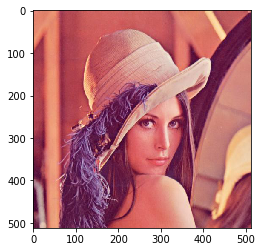

In [2]:
img = cv2.imread('datasets/hw3a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)

(512, 512, 3)


In [4]:
def histogram_equalization(array):
    hist, bins = np.histogram(array.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')    
    return cdf

In [5]:
def cdf_to_hist(cdf):
    hist = np.zeros_like(cdf)
    for i, j in enumerate(cdf):
        if i == 0:
            hist[i] = cdf[i]
        else:
            hist[i] = cdf[i] - cdf[i - 1]
    return hist

In [6]:
def plot_show(before, before_title, after, after_title):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(before)
    ax[0].set(title=before_title)
    ax[1].plot(after)
    ax[1].set(title=after_title)
    plt.show()

In [7]:
def img_show(before, before_title, after, after_title):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(before)
    ax[0].set(xticks=[], yticks=[], title=before_title)
    ax[1].imshow(after)
    ax[1].set(xticks=[], yticks=[], title=after_title)
    plt.show()

### BGR
* B: Blue 
* G: Green 
* R: Red 

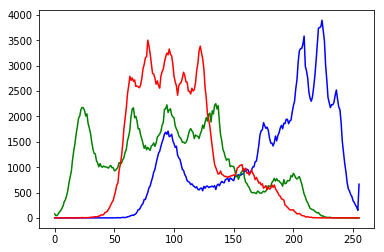

In [8]:
color = ('b','g','r')
rgb_list = list()
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    rgb_list.append(histr)
    plt.plot(histr, color = col)
plt.show()
b_array = rgb_list[0]
g_array = rgb_list[1]
r_array = rgb_list[2]

### B
* After histogram equalization with blue channel, the image becomes lighter.

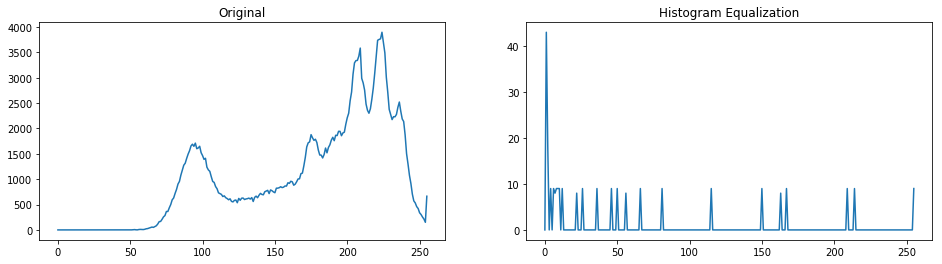

In [9]:
cdf = histogram_equalization(b_array)
hist = cdf_to_hist(cdf)
plot_show(b_array, 'Original', hist, 'Histogram Equalization')

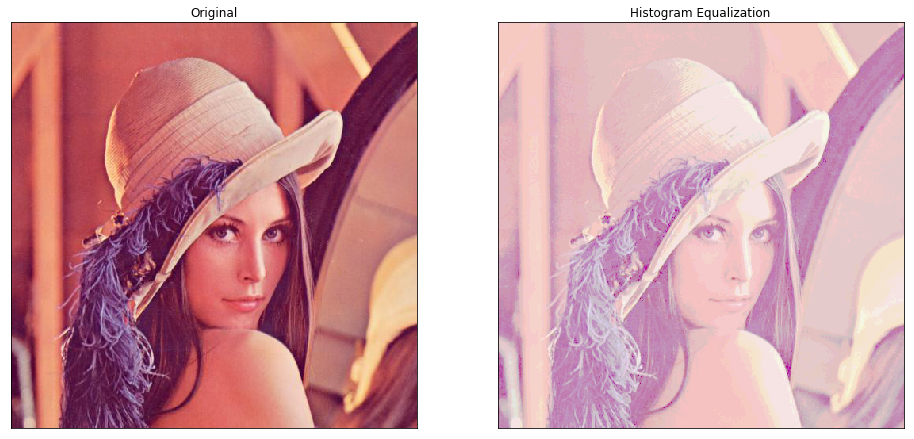

In [10]:
b_img = cdf[img]
img_show(img, 'Original', b_img, 'Histogram Equalization')

### G
* After histogram equalization with green channel, the image becomes lighter.

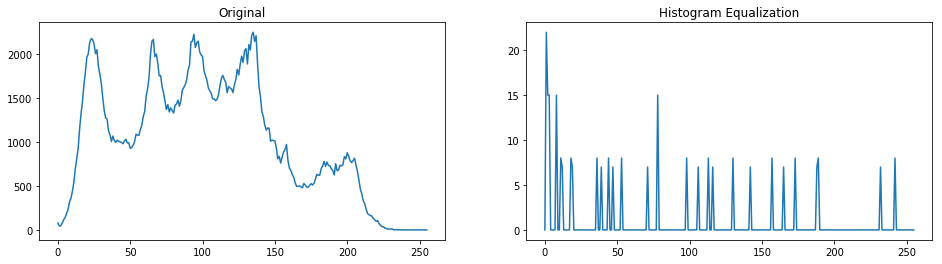

In [11]:
cdf = histogram_equalization(g_array)
hist = cdf_to_hist(cdf)
plot_show(g_array, 'Original', hist, 'Histogram Equalization')

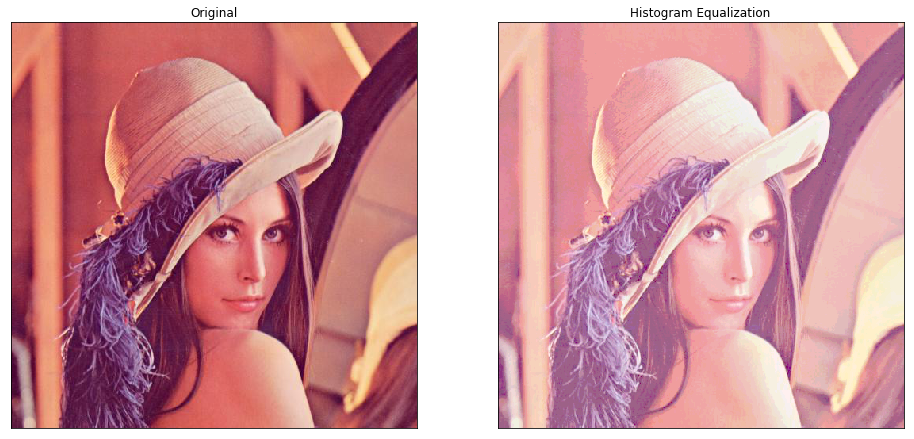

In [12]:
g_img = cdf[img]
img_show(img, 'Original', g_img, 'Histogram Equalization')

### R
* After histogram equalization with red channel, the image becomes lighter.

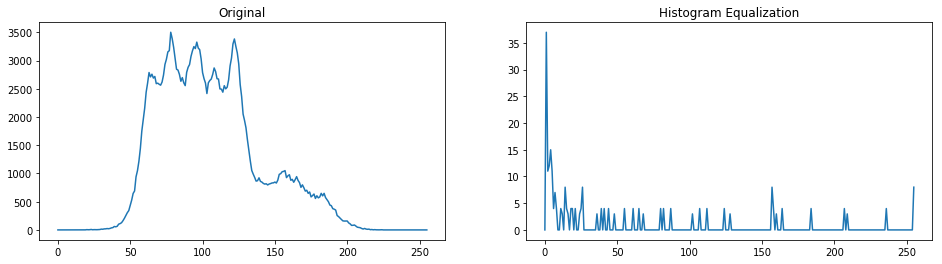

In [13]:
cdf = histogram_equalization(r_array)
hist = cdf_to_hist(cdf)
plot_show(r_array, 'Original', hist, 'Histogram Equalization')

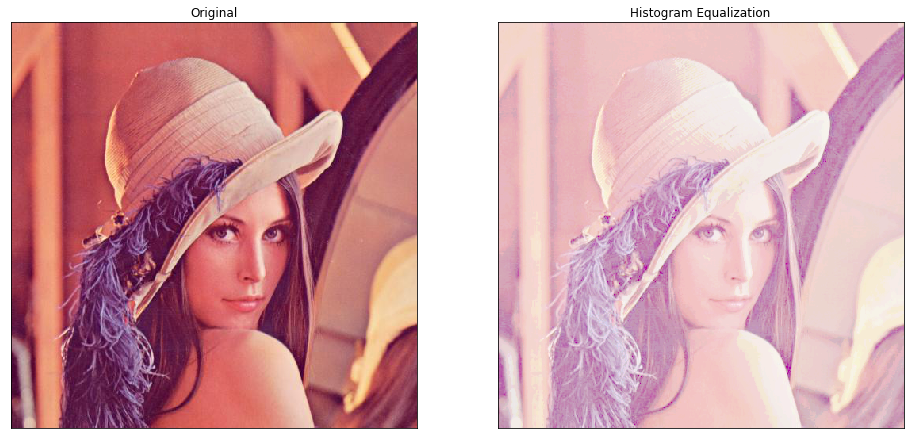

In [14]:
r_img = cdf[img]
img_show(img, 'Original', r_img, 'Histogram Equalization')

### HSV
* Hue
* Saturation
* Value

In [15]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

### H
* After histogram equalization with hue channel, the image becomes dazzling in red and yellow.

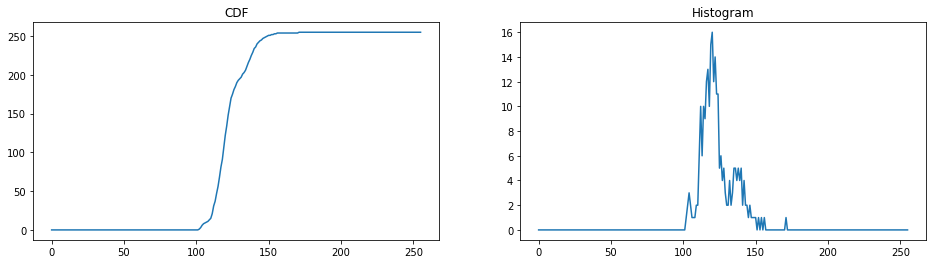

In [16]:
cdf = histogram_equalization(h)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

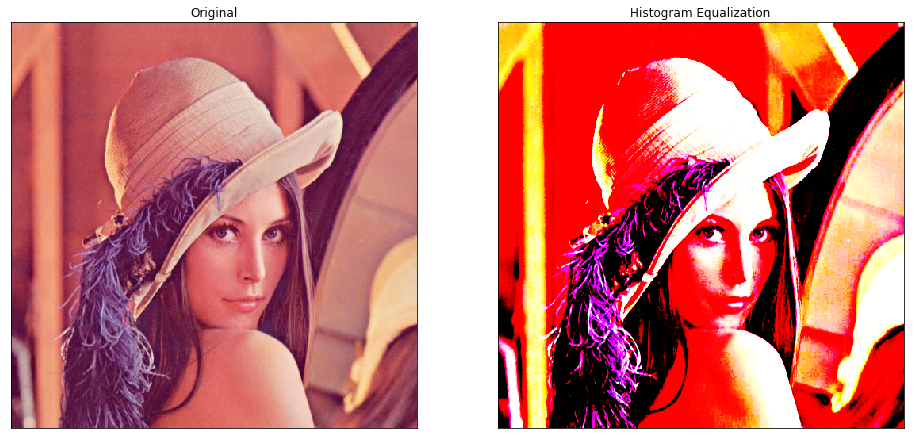

In [17]:
h_img = cdf[img]
img_show(img, 'Original', h_img, 'Histogram Equalization')

### S
* After histogram equalization with saturation channel, the image becomes stronger in red and yellow.

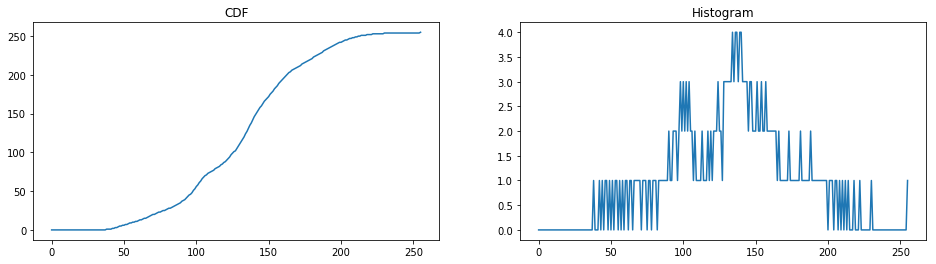

In [18]:
cdf = histogram_equalization(s)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

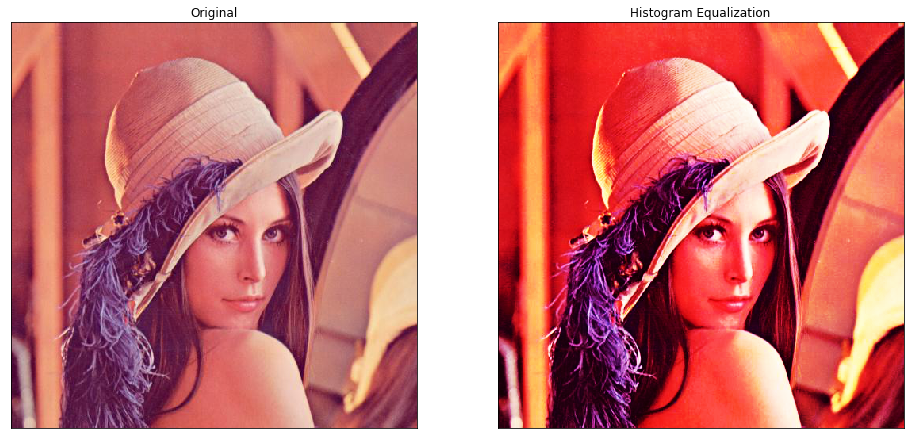

In [19]:
s_img = cdf[img]
img_show(img, 'Original', s_img, 'Histogram Equalization')

### V
* After histogram equalization with value channel, the image becomes a little bit darker.

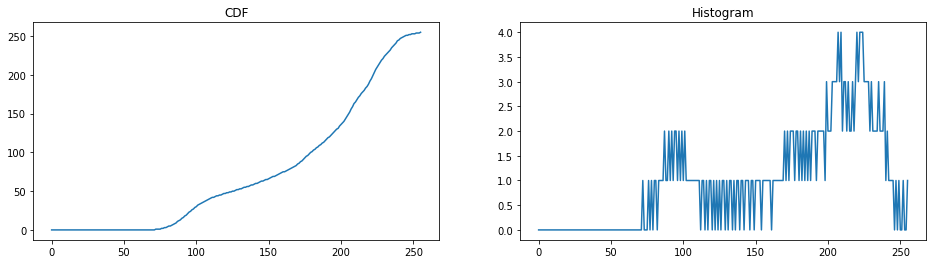

In [20]:
cdf = histogram_equalization(v)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

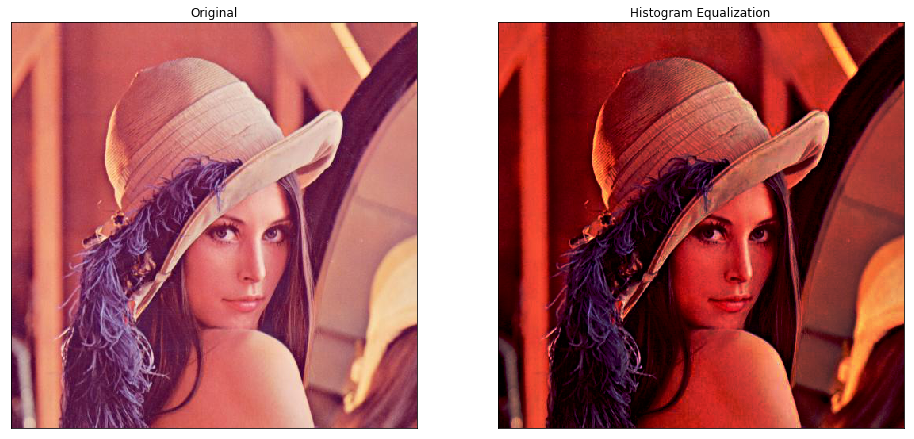

In [21]:
v_img = cdf[img]
img_show(img, 'Original', v_img, 'Histogram Equalization')

### YCbCr
* Y: Luminance
* Cb: Blue Chrominance
* Cr: Red Chrominance

In [22]:
ycc = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
y, cb, cr = cv2.split(ycc)

### Y
* After histogram equalization with luminance channel, the image becomes a little bit darker.

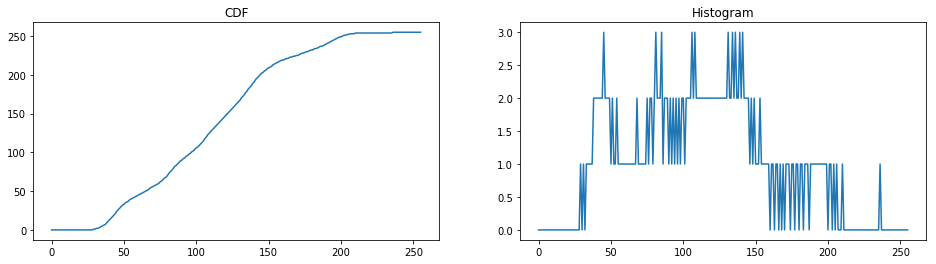

In [23]:
cdf = histogram_equalization(y)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

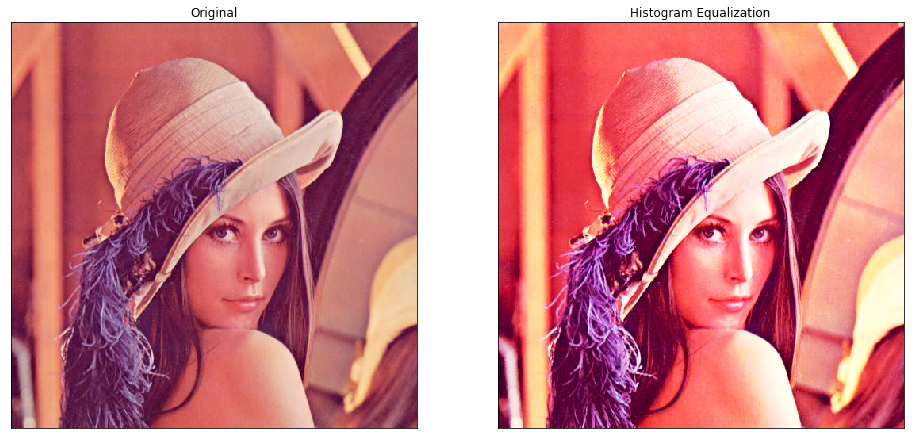

In [24]:
y_img = cdf[img]
img_show(img, 'Original', y_img, 'Histogram Equalization')

### Cb
* After histogram equalization with blue chrominance channel, the image becomes dazzling in blue.

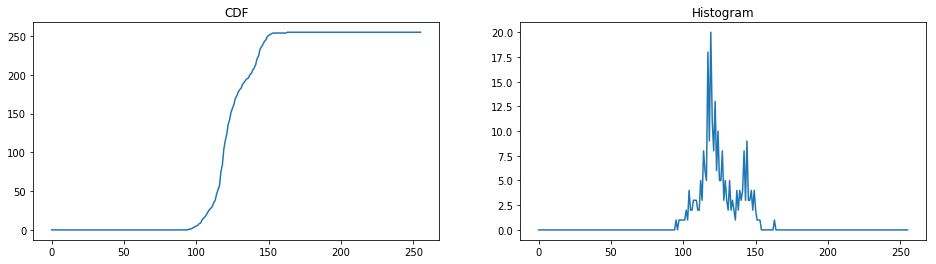

In [25]:
cdf = histogram_equalization(cb)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

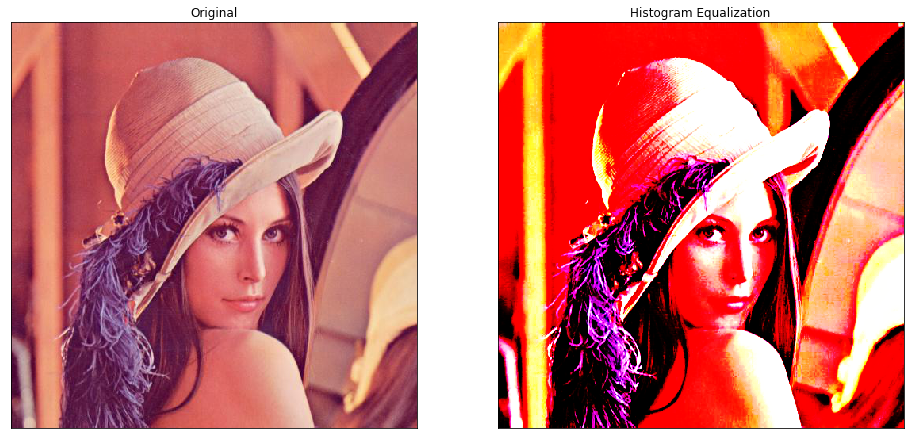

In [26]:
cb_img = cdf[img]
img_show(img, 'Original', cb_img, 'Histogram Equalization')

### Cr
* After histogram equalization with red chrominance channel, the image becomes dazzling in red.

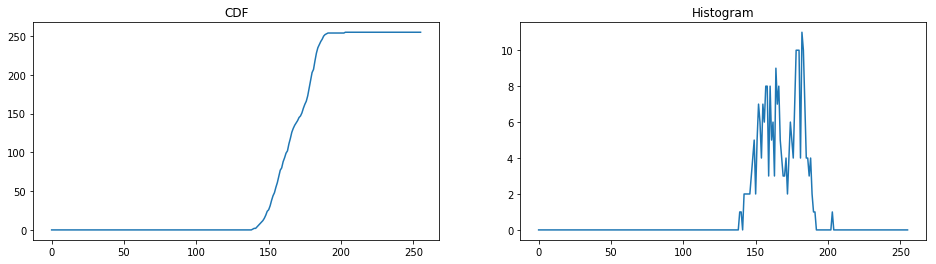

In [27]:
cdf = histogram_equalization(cr)
hist = cdf_to_hist(cdf)
plot_show(cdf, 'CDF', hist, 'Histogram')

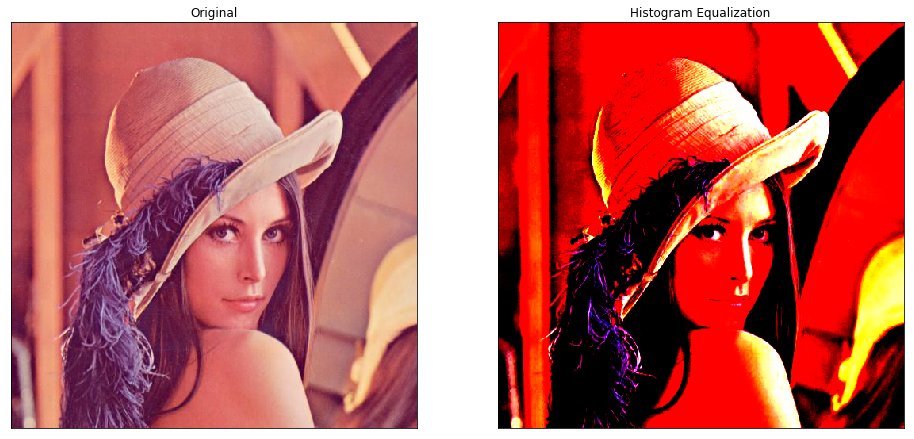

In [28]:
cr_img = cdf[img]
img_show(img, 'Original', cr_img, 'Histogram Equalization')